In [1]:
import numpy as np

In [8]:
# f=w*x
#f=2*x
X=np.array([1,2,3,4],dtype=np.float32)
y=np.array([2,4,6,8],dtype=np.float32)
w=0.0

#model prediction

def forward(x):
    return w*x

def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean()

#gradient

def gradient(x,y,y_predicted):
    return np.dot(2*x,y_predicted-y).mean()
  


print(f'prediction before training : f(5)={forward(5)}')
#Training
lr=0.01
n_iters=10
for epoch in range(n_iters):
    #prediction
    y_predicted=forward(X)
    #loss
    l=loss(y,y_predicted)
    #gradient
    dw=gradient(X,y,y_predicted)
    #update weight
    w-=lr*dw
    if epoch%2==0:
        print(f'epoch {epoch+1}/{n_iters}, loss={l}, w={w}')
print(f'prediction after training : f(5)={forward(5):.1f}')

prediction before training : f(5)=0.0
epoch 1/10, loss=30.0, w=1.2
epoch 3/10, loss=0.7680001854896545, w=1.871999988555908
epoch 5/10, loss=0.019660834223031998, w=1.9795200133323667
epoch 7/10, loss=0.0005033080233260989, w=1.9967231869697568
epoch 9/10, loss=1.2884394891443662e-05, w=1.999475698471069
prediction after training : f(5)=10.0


In [11]:
#replacing gradient calculation 
# f=w*x
#f=2*x
import torch
X=torch.tensor([1,2,3,4],dtype=torch.float32)
y=torch.tensor([2,4,6,8],dtype=torch.float32)
w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#model prediction

def forward(x):
    return w*x

def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean()


  


print(f'prediction before training : f(5)={forward(5)}')
#Training
lr=0.01
n_iters=50
for epoch in range(n_iters):
    #prediction
    y_predicted=forward(X)
    #loss
    l=loss(y,y_predicted)
    #gradient=backwardpass 
    l.backward()
    #update weights
    with torch.no_grad():
        w-=lr*w.grad
    w.grad.zero_()  # zero the gradients after updating weights to avoid accumulation of gradients from previous epoch  # important for the next epoch.

    if epoch%2==0:
        print(f'epoch {epoch+1}/{n_iters}, loss={l}, w={w}')
print(f'prediction after training : f(5)={forward(5):.1f}')

prediction before training : f(5)=0.0
epoch 1/50, loss=30.0, w=0.29999998211860657
epoch 3/50, loss=15.660187721252441, w=0.7717499136924744
epoch 5/50, loss=8.17471694946289, w=1.1125893592834473
epoch 7/50, loss=4.2672529220581055, w=1.358845829963684
epoch 9/50, loss=2.227532148361206, w=1.5367661714553833
epoch 11/50, loss=1.1627856492996216, w=1.6653136014938354
epoch 13/50, loss=0.6069811582565308, w=1.758189082145691
epoch 15/50, loss=0.3168478012084961, w=1.825291633605957
epoch 17/50, loss=0.1653965264558792, w=1.873773217201233
epoch 19/50, loss=0.08633805811405182, w=1.9088011980056763
epoch 21/50, loss=0.0450688973069191, w=1.934108853340149
epoch 23/50, loss=0.02352631464600563, w=1.952393651008606
epoch 25/50, loss=0.012280836701393127, w=1.9656044244766235
epoch 27/50, loss=0.0064106592908501625, w=1.9751492738723755
epoch 29/50, loss=0.0033464201260358095, w=1.982045292854309
epoch 31/50, loss=0.0017468547448515892, w=1.987027645111084
epoch 33/50, loss=0.00091188005171

In [ ]:
#1 . Design our model (input,ouput_size,foward_pass)
#2. Construct Loss and optimizer
#3. Training Loop
# -Forward Pass 
# -Backward Pass 
# -update weights

In [12]:
import torch 
import torch.nn as nn

In [13]:
#replacing gradient calculation 
# f=w*x
#f=2*x
import torch
X=torch.tensor([1,2,3,4],dtype=torch.float32)
y=torch.tensor([2,4,6,8],dtype=torch.float32)
w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#model prediction

def forward(x):
    return w*x

print(f'prediction before training : f(5)={forward(5)}')
#Training
lr=0.01
n_iters=50
loss=nn.MSELoss()
optimizer=torch.optim.SGD([w],lr=lr,)
for epoch in range(n_iters):
    #prediction
    y_predicted=forward(X)
    #loss
    l=loss(y,y_predicted)
    #gradient=backwardpass 
    l.backward()
    #update weights
    optimizer.step()
    optimizer.zero_grad() # zero the gradients after updating weights to avoid accumulation of gradients from previous epoch  # important for the next epoch.

    if epoch%2==0:
        print(f'epoch {epoch+1}/{n_iters}, loss={l}, w={w}')
print(f'prediction after training : f(5)={forward(5):.1f}')

prediction before training : f(5)=0.0
epoch 1/50, loss=30.0, w=0.29999998211860657
epoch 3/50, loss=15.660187721252441, w=0.7717499136924744
epoch 5/50, loss=8.17471694946289, w=1.1125893592834473
epoch 7/50, loss=4.2672529220581055, w=1.358845829963684
epoch 9/50, loss=2.227532148361206, w=1.5367661714553833
epoch 11/50, loss=1.1627856492996216, w=1.6653136014938354
epoch 13/50, loss=0.6069811582565308, w=1.758189082145691
epoch 15/50, loss=0.3168478012084961, w=1.825291633605957
epoch 17/50, loss=0.1653965264558792, w=1.873773217201233
epoch 19/50, loss=0.08633805811405182, w=1.9088011980056763
epoch 21/50, loss=0.0450688973069191, w=1.934108853340149
epoch 23/50, loss=0.02352631464600563, w=1.952393651008606
epoch 25/50, loss=0.012280836701393127, w=1.9656044244766235
epoch 27/50, loss=0.0064106592908501625, w=1.9751492738723755
epoch 29/50, loss=0.0033464201260358095, w=1.982045292854309
epoch 31/50, loss=0.0017468547448515892, w=1.987027645111084
epoch 33/50, loss=0.00091188005171

In [42]:
# replacing manually impmeneted pytorch function with nn

#replacing gradient calculation 
# f=w*x
#f=2*x
import torch
X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

n_sample,n_features =X.shape
print(n_sample,n_features)
input_size = n_features
output_size = n_features

# model=nn.Linear(input_size, output_size)
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear=nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)
    
model=LinearRegression(input_size,output_size)

x_test=torch.tensor([5],dtype=torch.float32)
print(f'prediction before training : f({x_test})={model(x_test)}'.format())
#Training
lr=0.01
n_iters=100
loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=lr,)
loss_value=[]
for epoch in range(n_iters):
    model.train()
    #prediction
    y_predicted=model(X)
    #loss
    l=loss(y,y_predicted)
    loss_value.append(l.item())
    #gradient=backwardpass 
    l.backward()
    #update weights
    optimizer.step()
    optimizer.zero_grad() # zero the gradients after updating weights to avoid accumulation of gradients from previous epoch  # important for the next epoch.

    if epoch%2==0:
        [w,b]=model.parameters()
        print(f'epoch {epoch+1},: w={w[0][0].item():.3f}, loss={l:.8f}')
print(f'prediction after training : f({x_test[0]})={model(x_test).item():.1f}')

4 1
prediction before training : f(tensor([5.]))=tensor([-4.5452], grad_fn=<ViewBackward0>)
epoch 1,: w=-0.310, loss=67.93379974
epoch 3,: w=0.379, loss=32.71066284
epoch 5,: w=0.857, loss=15.75181675
epoch 7,: w=1.189, loss=7.58664703
epoch 9,: w=1.419, loss=3.65534902
epoch 11,: w=1.579, loss=1.76252365
epoch 13,: w=1.690, loss=0.85115743
epoch 15,: w=1.768, loss=0.41233349
epoch 17,: w=1.821, loss=0.20102456
epoch 19,: w=1.859, loss=0.09925579
epoch 21,: w=1.885, loss=0.05022815
epoch 23,: w=1.903, loss=0.02659379
epoch 25,: w=1.915, loss=0.01518589
epoch 27,: w=1.924, loss=0.00966493
epoch 29,: w=1.931, loss=0.00697871
epoch 31,: w=1.935, loss=0.00565766
epoch 33,: w=1.938, loss=0.00499422
epoch 35,: w=1.941, loss=0.00464773
epoch 37,: w=1.942, loss=0.00445417
epoch 39,: w=1.944, loss=0.00433453
epoch 41,: w=1.945, loss=0.00425085
epoch 43,: w=1.945, loss=0.00418474
epoch 45,: w=1.946, loss=0.00412743
epoch 47,: w=1.947, loss=0.00407465
epoch 49,: w=1.947, loss=0.00402434
epoch 51,

Training loss


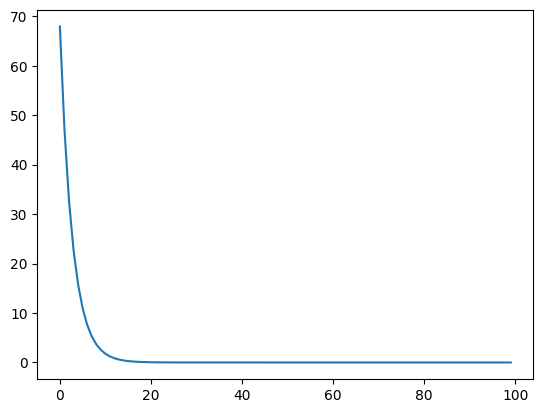

In [43]:
import matplotlib.pyplot as plt
print("Training loss")
plt.plot(loss_value)